In [1]:
%cd C:\Users\andyt\OneDrive\Desktop\MCS\Keystone Project

C:\Users\andyt\OneDrive\Desktop\MCS\Keystone Project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_reviews = pd.read_json('IMDB_reviews.json', lines=True)

In [4]:
df_details = pd.read_json('IMDB_movie_details.json', lines=True)

In [5]:
print('User reviews shape: ', df_reviews.shape)
print('Movie details shape: ', df_details.shape)

User reviews shape:  (573913, 7)
Movie details shape:  (1572, 7)


In [6]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [7]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [8]:
df_details.describe(include = 'O')

,movie_id,plot_summary,duration,genre,release_date,plot_synopsis
count,1572,1572,1572,1572,1572,1572
unique,1572,1572,132,237,1208,1340
top,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 44min,"[Action, Adventure, Sci-Fi]",2007-11-21,
freq,1,1,40,68,5,233


In [9]:
df_reviews.describe(include = 'O')

,review_date,movie_id,user_id,review_text,review_summary
count,573913,573913,573913,573913,573913
unique,7104,1572,263407,573385,499049
top,17 December 2003,tt0468569,ur2898520,I have never seen such an amazing film since I...,Disappointing
freq,355,4845,1303,16,794


In [10]:
df_reviews.drop(["user_id", "review_summary"], axis = 1, inplace = True)

In [11]:
df_details.drop(["duration"], axis = 1, inplace = True)

In [12]:
dataset = pd.merge(df_reviews,df_details, how="inner", on="movie_id")

In [13]:
dataset.drop(["rating_x", "rating_y", "review_date", "release_date", "genre"], axis=1, inplace=True)

In [14]:
dataset.head()


,movie_id,is_spoiler,review_text,plot_summary,plot_synopsis
0,tt0111161,True,"In its Oscar year, Shawshank Redemption (writt...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,tt0111161,True,The Shawshank Redemption is without a doubt on...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,tt0111161,True,I believe that this film is the best story eve...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,tt0111161,True,"**Yes, there are SPOILERS here**This film has ...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,tt0111161,True,At the heart of this extraordinary movie is a ...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [15]:
dataset.drop(["movie_id"], axis=1, inplace=True)

In [16]:
dataset.head()

,is_spoiler,review_text,plot_summary,plot_synopsis
0,True,"In its Oscar year, Shawshank Redemption (writt...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,True,The Shawshank Redemption is without a doubt on...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,True,I believe that this film is the best story eve...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,True,"**Yes, there are SPOILERS here**This film has ...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,True,At the heart of this extraordinary movie is a ...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [17]:
dataset.shape

(573906, 4)

In [18]:
dataset.head()

,is_spoiler,review_text,plot_summary,plot_synopsis
0,True,"In its Oscar year, Shawshank Redemption (writt...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,True,The Shawshank Redemption is without a doubt on...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,True,I believe that this film is the best story eve...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,True,"**Yes, there are SPOILERS here**This film has ...",Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,True,At the heart of this extraordinary movie is a ...,Chronicles the experiences of a formerly succe...,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [19]:
import re


def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [20]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
X.shape

(573906, 3)

In [21]:
from sklearn.preprocessing import OneHotEncoder
one_enc = OneHotEncoder()
Y_temp = one_enc.fit_transform(y.values.reshape(-1,1))
y = pd.DataFrame(Y_temp.toarray())
y.drop(0, axis = 1, inplace = True)
y.rename(columns = {1:'is_spoiler'}, inplace = True)
y

,is_spoiler
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
573901,0.0
573902,0.0
573903,0.0
573904,0.0


In [22]:
y


,is_spoiler
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
573901,0.0
573902,0.0
573903,0.0
573904,0.0


In [23]:
Y_col = 'is_spoiler'
X_cols = dataset.loc[:, dataset.columns != Y_col].columns

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[X_cols], y[Y_col], test_size = 0.2, random_state = 1)

#X_val, y_val = train_test_split(X_train[X_cols], y_train, test_size = 0.2, random_state = 1)
X_train

,review_text,plot_summary,plot_synopsis
123552,"i love the show, and first saw the show i reme...",This television drama is about the two Winches...,
441701,This is testimony to how much more sophisticat...,Rancher Dan Evans heads into Bisbee to clear u...,"The legendary outlaw, Ben Wade (Russell Crowe)..."
274248,I didnt know what to expect from bright but i ...,"In Los Angeles, humans live with orcs and elve...",This film is set in an alternate reality of th...
505997,Well now. I just saw this movie for the first ...,"Frozen in 1996, Simon Phoenix, a convicted cri...","In an alternate 1996, Los Angeles has descende..."
572457,The animation is superb and only occasionally ...,"In New York City, you would come across a smal...",The film opens with Fredrick and Eleanor Littl...
...,...,...,...
371403,"In The Butterfly Effect, Ashton Kutcher stars ...",Evan Treborn grows up in a small town with his...,"In the year 1998, Evan Treborn (Ashton Kutcher..."
491263,Compare this story to Errol Flynn's Adventures...,After being captured by Turks during the Crusa...,"Robin of Locksley (Kevin Costner), an English ..."
470924,After watching this flick with low expectation...,Two soldiers stationed in Kazahkstan (Captain ...,"The film opens in France, in 1641. The Scotsma..."
491755,Having seen the original first (and loved it) ...,Sam Bowden (Nick Nolte)is a small-town corpora...,Danielle Bowden (Juliette Lewis) narrates her ...


In [25]:
X_train.values

array([["i love the show, and first saw the show i remember in November i saw the episode Home and after that i was hooked i haven't been able to stop talking about it, the show is awesome and i can't wait for all of the new episodes i think the second season is going to be the greatest. Jared Padalecki and Jensen Ackles are perfect for these characters they make it look so real they are great actors and hot and the brotherly love is so sweet and it's funny. this show has anything you could ever want in a series,drama,horror,fantasy,comedy,romance etc and can't forget the hot guys. i love it.... it is the greatest show ever created ugh i love it",
        'This television drama is about the two Winchester brothers, Sam and Dean, who were raised by their father, John, to hunt and kill all things that go "bump in the night" after his wife, Mary, was murdered by an evil supernatural being when the boys were young. 22 years later the brothers set out on a journey, fighting evil along the w

In [26]:
y_train.shape


(459124,)

In [27]:
X_train.head()

,review_text,plot_summary,plot_synopsis
123552,"i love the show, and first saw the show i reme...",This television drama is about the two Winches...,
441701,This is testimony to how much more sophisticat...,Rancher Dan Evans heads into Bisbee to clear u...,"The legendary outlaw, Ben Wade (Russell Crowe)..."
274248,I didnt know what to expect from bright but i ...,"In Los Angeles, humans live with orcs and elve...",This film is set in an alternate reality of th...
505997,Well now. I just saw this movie for the first ...,"Frozen in 1996, Simon Phoenix, a convicted cri...","In an alternate 1996, Los Angeles has descende..."
572457,The animation is superb and only occasionally ...,"In New York City, you would come across a smal...",The film opens with Fredrick and Eleanor Littl...


In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

In [29]:
training_dataset1 = tf.data.Dataset.from_tensor_slices(
    (X_train['review_text'].values, y_train.values)).batch(batch_size=32)
training_dataset2 = tf.data.Dataset.from_tensor_slices(
    (X_train['plot_summary'].values, y_train.values)).batch(batch_size=32)
training_dataset3 = tf.data.Dataset.from_tensor_slices(
    (X_train['plot_synopsis'].values, y_train.values)).batch(batch_size=32)
training_dataset = tf.data.Dataset.from_tensor_slices(
    (X_train.values, y_train.values))


In [ ]:
training_dataset

In [ ]:
training_dataset1

In [ ]:
#Bag Of Words
vocab_size = 10000

count_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode='count'
)

combineAll = X_train['review_text'] + ' ' + X_train['plot_summary'] + ' ' + X_train['plot_synopsis']
count_vectorizer.adapt(combineAll.values)

In [ ]:
count_vectorizer.get_vocabulary()[:50]


In [30]:
#Bag Of Words
vocab_size = 10000

count_vectorizer1 = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode='count'
)

count_vectorizer1.adapt(X_train['review_text'].values)

In [31]:
count_vectorizer1.get_vocabulary()[:50]

['[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'that',
 'this',
 'movie',
 'was',
 'as',
 'for',
 'with',
 'but',
 'film',
 'you',
 'not',
 'his',
 'on',
 'are',
 'he',
 'have',
 'be',
 'its',
 'all',
 'one',
 'an',
 'at',
 'so',
 'by',
 'they',
 'like',
 'from',
 'just',
 'who',
 'has',
 'about',
 'more',
 'or',
 'good',
 'what',
 'out',
 'there',
 'if',
 'some',
 'story']

In [ ]:
#TFDIF
vocab_size = 10000

tfidf_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode='tf-idf',
    ngrams=(2, 3)
)

tfidf_vectorizer.adapt(combineAll.values)

In [ ]:
tfidf_vectorizer.get_vocabulary()[:10]

In [32]:
#Bag Of Words Model

#model1 = Sequential([
#    count_vectorizer,
#    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=1e-3)),
#])

# model2 = Sequential([
#     count_vectorizer,
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=1e-3)),
# ])

# model3 = Sequential([
#     count_vectorizer,
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=1e-3)),
# ])

#y1 = model1(training_dataset1)
#y2 = model1(training_dataset2)
#y3 = model1(training_dataset3)


#concatted = tf.keras.layers.Concatenate()([y1, y2, y3])

#model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model = Sequential([
    count_vectorizer1,
    layers.Dense(192, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=1e-3)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=1e-3)),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])



In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense (Dense)               (None, 192)               1920192   
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

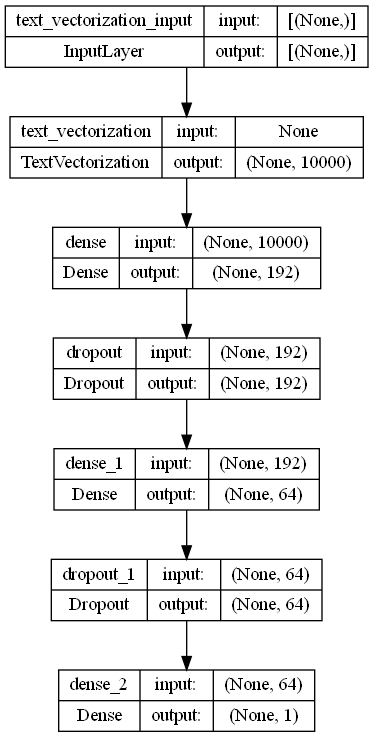

In [34]:
import pydot
import graphviz 
tf.keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(
    training_dataset1,
    steps_per_epoch=len(training_dataset),
    epochs=5,
    #validation_data=validation_dataset,
    #validation_steps=len(validation_dataset)
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(preprocessor = clean_text,stop_words='english')

In [ ]:
tfidf.fit_transform(X_train)

In [ ]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
X_train_tfidf

In [ ]:
tfidf.get_feature_names()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_enc = OneHotEncoder()
Y_temp = one_enc.fit_transform(y.values.reshape(-1,1))

In [ ]:
y = pd.DataFrame(Y_temp.toarray())

In [ ]:
y

In [ ]:
y.drop(0, axis = 1, inplace = True)

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
X_train_tfidf.shape

In [ ]:
y_train.shape

In [ ]:
rf.fit(X_train_tfidf, y_train)

In [ ]:
y_pred = rf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
y_pred_Train = rf.predict(X_train_tfidf)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_Train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)